In [3]:
# Import required modules
import codecs
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [7]:
# Read in html data into a python list using bs4
path_vaac = "/home/aprata/vaac_data/tokyo/"
fn_vacc = "20200801_28409600_0184_Text.html"
with codecs.open(path_vaac + fn_vacc, 'r') as f:
    html = f.read()
soup = BeautifulSoup(html, features="lxml")
div = soup.find('div')
vaac = [str(s) for s in div.contents if str(s) != '<br/>' and str(s) != str('\n')]
# Print out VAAC info
vaac

[' VAA Text Start ',
 'FVFE01 RJTD 010600',
 'VA ADVISORY',
 'DTG: 20200801/0600Z',
 'VAAC: TOKYO',
 'VOLCANO: NISHINOSHIMA 284096',
 'PSN: N2715 E14052',
 'AREA: JAPAN',
 'SUMMIT ELEV: 25M',
 'ADVISORY NR: 2020/184',
 'INFO SOURCE: HIMAWARI-8',
 'AVIATION COLOUR CODE: NIL',
 'ERUPTION DETAILS: VA EMISSIONS CONTINUING',
 'OBS VA DTG: 01/0520Z',
 'OBS VA CLD: SFC/FL190 N2715 E14053 - N2330 E14230 - N2306 E14346 - ',
 'N2224 E14302 - N2257 E13733 - N2508 E13624 - N2411 E13942 MOV S 10KT',
 'FCST VA CLD +6 HR: 01/1120Z SFC/FL190 N2302 E14154 - N2238 E14318 - ',
 'N2153 E14204 - N2249 E13622 - N2507 E13527 - N2405 E13849 - N2717 ',
 'E14054',
 'FCST VA CLD +12 HR: 01/1720Z SFC/FL190 N2704 E14116 - N2207 E14226 - ',
 'N2121 E14056 - N2254 E13509 - N2519 E13413 - N2353 E13810 - N2717 ',
 'E14056',
 'FCST VA CLD +18 HR: 01/2320Z SFC/FL190 N2624 E14152 - N2144 E14122 - ',
 'N2110 E13918 - N2249 E13422 - N2558 E13248 - N2400 E13736 - N2717 ',
 'E14050',
 'RMK: NIL',
 'NXT ADVISORY: 20200801/120

In [8]:
# Important information is contained in list entries 14 and 15
polygon = vaac[14] + vaac[15]
coords = polygon[22:-11].split('-')
coords

['N2715 E14053 ',
 ' N2330 E14230 ',
 ' N2306 E14346 ',
 ' N2224 E14302 ',
 ' N2257 E13733 ',
 ' N2508 E13624 ',
 ' N2411 E13942']

In [11]:
# Convert VAAC coords to decimals for plotting on a map
lons_polygon = []
lats_polygon = []

for coord in coords:
    lat_str, lon_str = coord.strip().split(' ')
    lat_decimal, lon_decimal = float(lat_str[1:]) / 100., float(lon_str[1:]) / 100.
    lat_split = '{0:.2f}'.format(lat_decimal).split('.')
    lon_split = '{0:.2f}'.format(lon_decimal).split('.')
    lat_float = float(lat_split[0]) + float(lat_split[1]) / 60.
    lon_float = float(lon_split[0]) + float(lon_split[1]) / 60.
    if "E" in lon_str:
        lons_polygon.append(lon_float)
    else:
        lons_polygon.append(-lon_float)
    if "N" in lat_str:
        lats_polygon.append(lat_float)
    else:
        lats_polygon.append(-lat_float)

lons_polygon.append(lons_polygon[0])
lats_polygon.append(lats_polygon[0])
lons_polygon, lats_polygon

([140.88333333333333,
  142.5,
  143.76666666666668,
  143.03333333333333,
  137.55,
  136.4,
  139.7,
  140.88333333333333],
 [27.25,
  23.5,
  23.1,
  22.4,
  22.95,
  25.133333333333333,
  24.183333333333334,
  27.25])

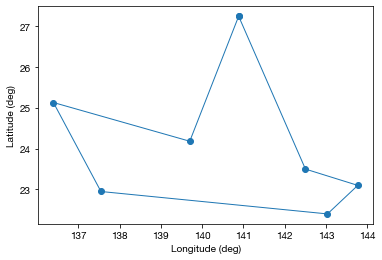

In [13]:
# Plot the polygon
plt.plot(lons_polygon, lats_polygon, 'o-')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.show()